In [139]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.gridspec as gridspec
from sqlalchemy import create_engine

In [140]:
engine = create_engine("sqlite:///riders.sqlite")
conn = engine.connect()

In [141]:
engine.execute("SELECT * FROM riders").fetchall()

[(0, '2112 W Peterson Ave', '2112 W Peterson Ave', '(41.991178, -87.683593)', '(41.991178, -87.683593)', 'Female', 1.0333333333333334, 1),
 (1, '2112 W Peterson Ave', 'Broadway & Argyle St', '(41.991178, -87.683593)', '(41.973815, -87.65966)', 'Male', 15.95, 1),
 (2, '2112 W Peterson Ave', 'Broadway & Granville Ave', '(41.991178, -87.683593)', '(41.9947796884, -87.6602845349)', 'Male', 8.05, 1),
 (3, '2112 W Peterson Ave', 'Broadway & Ridge Ave', '(41.991178, -87.683593)', '(41.9840446107, -87.6602738295)', 'Male', 15.733333333333333, 1),
 (4, '2112 W Peterson Ave', 'Broadway & Thorndale Ave', '(41.991178, -87.683593)', '(41.98974251144, -87.6601406209)', 'Male', 7.216666666666667, 10),
 (5, '2112 W Peterson Ave', 'Clark St & Berwyn Ave', '(41.991178, -87.683593)', '(41.9779966544, -87.6680471047)', 'Male', 10.7, 3),
 (6, '2112 W Peterson Ave', 'Clark St & Bryn Mawr Ave', '(41.991178, -87.683593)', '(41.983593, -87.669154)', 'Male', 9.683333333333334, 1),
 (7, '2112 W Peterson Ave', 'C

In [142]:
df = pd.DataFrame(engine.execute("SELECT * FROM riders").fetchall())

In [143]:
df.head()

,0,1,2,3,4,5,6,7
0,0,2112 W Peterson Ave,2112 W Peterson Ave,"(41.991178, -87.683593)","(41.991178, -87.683593)",Female,1.033333,1
1,1,2112 W Peterson Ave,Broadway & Argyle St,"(41.991178, -87.683593)","(41.973815, -87.65966)",Male,15.950000,1
2,2,2112 W Peterson Ave,Broadway & Granville Ave,"(41.991178, -87.683593)","(41.9947796884, -87.6602845349)",Male,8.050000,1
3,3,2112 W Peterson Ave,Broadway & Ridge Ave,"(41.991178, -87.683593)","(41.9840446107, -87.6602738295)",Male,15.733333,1
4,4,2112 W Peterson Ave,Broadway & Thorndale Ave,"(41.991178, -87.683593)","(41.98974251144, -87.6601406209)",Male,7.216667,10


In [144]:
riders_duration = pd.read_sql("SELECT * FROM riders", con=engine)
riders_duration.head()

,index,Station_Name_x,Station_Name_y,Location_x,Location_y,gender,Avg_duration,Trip_counts
0,0,2112 W Peterson Ave,2112 W Peterson Ave,"(41.991178, -87.683593)","(41.991178, -87.683593)",Female,1.033333,1
1,1,2112 W Peterson Ave,Broadway & Argyle St,"(41.991178, -87.683593)","(41.973815, -87.65966)",Male,15.950000,1
2,2,2112 W Peterson Ave,Broadway & Granville Ave,"(41.991178, -87.683593)","(41.9947796884, -87.6602845349)",Male,8.050000,1
3,3,2112 W Peterson Ave,Broadway & Ridge Ave,"(41.991178, -87.683593)","(41.9840446107, -87.6602738295)",Male,15.733333,1
4,4,2112 W Peterson Ave,Broadway & Thorndale Ave,"(41.991178, -87.683593)","(41.98974251144, -87.6601406209)",Male,7.216667,10


In [145]:
gender_rider_duration = riders_duration[['gender', 'Avg_duration', 'Station_Name_x', 'Station_Name_y']]

In [146]:
gender_rider_duration.head()

,gender,Avg_duration,Station_Name_x,Station_Name_y
0,Female,1.033333,2112 W Peterson Ave,2112 W Peterson Ave
1,Male,15.950000,2112 W Peterson Ave,Broadway & Argyle St
2,Male,8.050000,2112 W Peterson Ave,Broadway & Granville Ave
3,Male,15.733333,2112 W Peterson Ave,Broadway & Ridge Ave
4,Male,7.216667,2112 W Peterson Ave,Broadway & Thorndale Ave


In [147]:
gender_rider_duration["Avg_duration"].min()

1.0166666666666666

In [148]:
# female_rider_duration = gender_rider_duration.sort_values('Avg_duration', ascending=True)
female_top_10 = female_rider_duration.loc[female_rider_duration['gender'] == 'Female']
# female_top_10_duration = female_top_10.nlargest(10,'Avg_duration')
female_top_10_duration

,gender,Avg_duration,Station_Name_x,Station_Name_y
17695,Female,16.65,Damen Ave & Pierce Ave,Sangamon St & Washington Blvd
60169,Female,16.65,Winchester Ave & Elston Ave,Troy St & Elston Ave
36391,Female,16.65,Manor Ave & Leland Ave,California Ave & Fletcher St
1109,Female,16.65,Albany Ave & Bloomingdale Ave,Damen Ave & Division St
45033,Female,16.65,Racine Ave & Fullerton Ave,Damen Ave & Pierce Ave
38602,Female,16.65,Michigan Ave & Oak St,Ashland Ave & Division St
18477,Female,16.65,Dearborn Pkwy & Delaware Pl,Ashland Ave & Grand Ave
21965,Female,16.65,Fairbanks Ct & Grand Ave,Clark St & Armitage Ave
41640,Female,16.65,Ogden Ave & Chicago Ave,California Ave & Division St
56210,Female,16.65,Wacker Dr & Washington St,Clark St & Elm St


In [149]:
male_rider_duration = gender_rider_duration.sort_values('Avg_duration', ascending=False)
male_top_10 = male_rider_duration.loc[male_rider_duration['gender'] == 'Male']
# female_top_10_duration = female_top_10.nlargest(10,'Avg_duration')
male_top_10_duration

,gender,Avg_duration,Station_Name_x,Station_Name_y
25224,Male,16.65,Greenview Ave & Fullerton Ave,Dearborn Pkwy & Delaware Pl
5445,Male,16.65,California Ave & Altgeld St,Sheffield Ave & Fullerton Ave
2606,Male,16.65,Ashland Ave & Grand Ave,LaSalle St & Adams St
49144,Male,16.65,Sheffield Ave & Webster Ave,Wells St & Hubbard St
17749,Male,16.65,Damen Ave & Pierce Ave,Wood St & Taylor St
2745,Male,16.65,Ashland Ave & Lake St,Halsted St & Maxwell St
8807,Male,16.65,Cityfront Plaza Dr & Pioneer Ct,Damen Ave & Pierce Ave
59600,Male,16.65,Western Ave & Winnebago Ave,Southport Ave & Roscoe St
38665,Male,16.65,Michigan Ave & Oak St,Halsted St & Clybourn Ave
29739,Male,16.65,LaSalle Dr & Huron St,Damen Ave & Pierce Ave


In [150]:
male_rider_duration = gender_rider_duration.sort_values('Avg_duration', ascending=False)
male_top_10 = male_rider_duration.loc[male_rider_duration['gender'] == 'Male']
# male_top_10_duration = male_top_10.nlargest(10,'Avg_duration')
male_top_10_duration.head()

,gender,Avg_duration,Station_Name_x,Station_Name_y
25224,Male,16.65,Greenview Ave & Fullerton Ave,Dearborn Pkwy & Delaware Pl
5445,Male,16.65,California Ave & Altgeld St,Sheffield Ave & Fullerton Ave
2606,Male,16.65,Ashland Ave & Grand Ave,LaSalle St & Adams St
49144,Male,16.65,Sheffield Ave & Webster Ave,Wells St & Hubbard St
17749,Male,16.65,Damen Ave & Pierce Ave,Wood St & Taylor St


In [159]:
Station = male_top_10_duration['Station_Name_x']
Duration = male_top_10_duration['Avg_duration']
x_axis = np.arange(len(Station))

([<matplotlib.axis.XTick at 0x13e656cc0>,
 <a list of 10 Text xticklabel objects>)

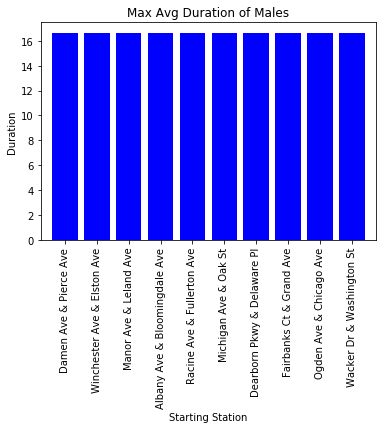

In [180]:
plt.bar(Station, Duration, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Station)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.title("Max Avg Duration of Males")
plt.xlabel("Starting Station")
plt.ylabel("Duration")
plt.xticks(x_axis, Station, rotation='vertical')

In [182]:
Station_female = female_top_10_duration['Station_Name_x']
Duration_female = female_top_10_duration['Avg_duration']
x_axis_female = np.arange(len(Station))

([<matplotlib.axis.XTick at 0x13c7b9748>,
 <a list of 10 Text xticklabel objects>)

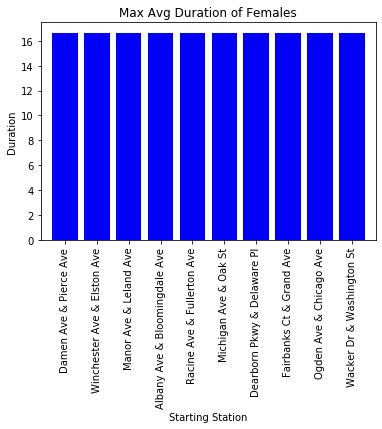

In [183]:
plt.bar(Station, Duration, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Station)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.title("Max Avg Duration of Females")
plt.xlabel("Starting Station")
plt.ylabel("Duration")
plt.xticks(x_axis_female, Station_female, rotation='vertical')